# Examen 2: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia

El examen consta de dos partes, cada una con igual valor. Es un examen individual y no se permite el uso de herramientas de inteligencia artificial para su realización. Una lectura detallada será suficiente para resolver ambos problemas, basándose en los conocimientos adquiridos en el curso.


In [6]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from scipy.integrate import quad
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

### I. Radiación de Cuerpo Negro:

 La radiación de cuerpo negro, se refiere a la radiación electromagnética emitida por un objeto que absorbe toda la radiación incidente sin reflejar nada. La cual  puede ser modelada según la ley de Planck que relaciona la intensidad de la radiación de un cuerpo negro con la temperatura del objeto. A medida que la temperatura aumenta, la longitud de onda máxima de la radiación se desplaza hacia longitudes de onda más cortas. Para generar una intuición,  piensa en  trozo  de carbón, el cual representa un ejemplo cercano a lo que se conoce como un cuerpo negro en física. Este elemento tiene la particularidad de reflejar mínimamente la luz, capturando prácticamente toda la radiación que recibe. Al alcanzar temperaturas elevadas, similar a las de las brasas ardientes, el carbón comienza a emitir radiación tanto en el rango visible como en el infrarrojo del espectro.

  La radiación de cuerpo negro puede ser modelada empleando la ley de Planck para describir la densidad  espectral  de energía de la radiación emitida por un cuerpo negro a una temperatura (T). La ley de Planck establece que la densidad espectral de energía $u(\lambda, T)$  para un cuerpo negro está dada por:

\begin{equation}
u(\lambda, T) = \frac{{8\pi hc}}{{\lambda^5}} \cdot \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}
\end{equation}

 donde:

$h = 6.62607015  \times 10^{-34} \mathrm{J} s$ : es la constante de Planck.

$c = 299792458 \mathrm{m/s}$ : es la velocidad de la luz.


$k_B = 1.380649 \times 10^{-23}\mathrm{J/K}$ : es la constante de Boltzmann.

$ \lambda$ es la longitud de onda.


Podemos integrar la densidad espectral de energía sobre todas las longitudes de onda para obtener la potencia total emitida por unidad de área de un cuerpo negro a una temperatura (T) (ley  de Stefan-Boltzmann):


\begin{equation}
P_{\text{total}} = \sigma T^4
\end{equation}

donde:

$\sigma$ es la constante de Stefan-Boltzmann.


Su tarea en este examen será:

1. Realizar una gráfica de $u(\lambda, T)$ vs $\lambda$, toma valores de $\lambda$ entre $1\mathrm{nm}$ y $8\mathrm{\mu m}$, para valores de
```T=np.array([1000,2000,4000,5000]) ```K


Las curvas resultantes deben reflejar el comportamiento típico de datos experimentales, tal como se muestra al ejecutar el siguiente código :

```python
import requests
from io import StringIO


# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)
```






In [7]:
from scipy.constants import h,c,k # La constante de plank, la velocidad de la luz y la constante de Boltzmann.
print(h,c,k,sep="\n")

6.62607015e-34
299792458.0
1.380649e-23


In [8]:
def densidad_espectral(lamb,temperatura):
  l = np.array([])
  u = lambda lamb,temperatura: (8*np.pi*h*c)/ (lamb**5 * (np.exp((h * c) / (lamb * k * temperatura))-1))
  for e in lamb:
    r = u(e,temperatura)
    l = np.append(l,r)
  return l

In [9]:
lamb = np.linspace(1e-9, 8e-6, 1000)
T = np.array([1000, 2000, 4000, 5000])
df = pd.DataFrame(columns=T) # Nombro las columnas
for T_ in T:
  p = densidad_espectral(lamb, T_)
  df[T_] = p

<ipython-input-8-20813e2b131a>:3: RuntimeWarning: overflow encountered in exp
  u = lambda lamb,temperatura: (8*np.pi*h*c)/ (lamb**5 * (np.exp((h * c) / (lamb * k * temperatura))-1))


***Nota***: Para λ ya muy pequeños $e^{\frac{{hc}}{{\lambda k_B T}}}$ se desborda por eso da inf. entonces esos datos se pierden y por ende no aportan ya al calculo de la densidad espectral

In [10]:
np.exp((h * c) / (1e-9 * k * 5000))

<ipython-input-10-4d1396f38c5a>:1: RuntimeWarning: overflow encountered in exp
  np.exp((h * c) / (1e-9 * k * 5000))


inf

In [11]:
np.exp((h * c) / (1e-6 * k * 5000))

17.77074836094772

Asi queda entonces el dataframe

In [12]:
df

,1000,2000,4000,5000
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,3.091752e-157,1.503996e-122
2,0.000000e+00,8.230103e-169,5.368389e-77,1.238032e-58
3,9.454361e-236,6.937641e-111,1.879324e-48,5.761819e-36
4,8.226909e-176,3.232734e-81,6.408209e-34,1.845738e-24
...,...,...,...,...
995,3.057401e+01,1.059886e+02,2.724488e+02,3.573748e+02
996,3.048693e+01,1.056186e+02,2.714225e+02,3.560103e+02
997,3.040014e+01,1.052501e+02,2.704010e+02,3.546523e+02
998,3.031364e+01,1.048833e+02,2.693844e+02,3.533007e+02


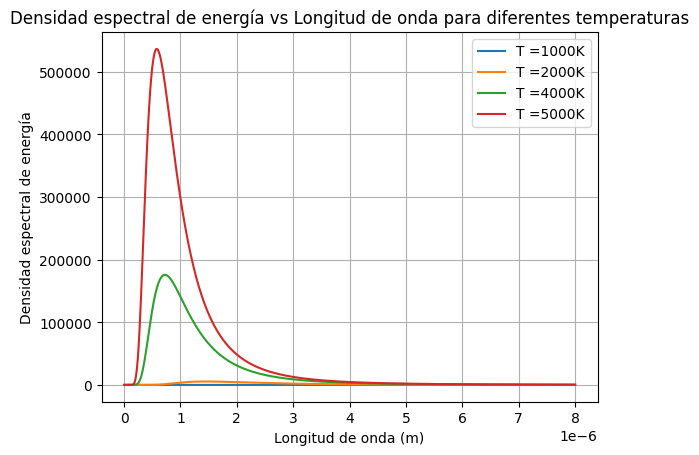

In [13]:
for c in df:
  plt.plot(lamb,df[c],label = f"T ={c}K")
plt.xlabel('Longitud de onda (m)')
plt.ylabel('Densidad espectral de energía')
plt.title('Densidad espectral de energía vs Longitud de onda para diferentes temperaturas')
plt.legend()
plt.grid()
plt.show()


2. Determina la longitud de onda para el cual se obtiene el  máximo valor de cada unas de las anteriores curvas, comprueba que $\lambda_{max} T=2897.8 \mathrm{\mu mK}$

In [14]:
l = np.array([])
for c in df:
  max = df[c].idxmax()
  l = np.append(l,max)
l

array([362., 181.,  90.,  72.])

In [15]:
type(l[0])

numpy.float64

In [16]:
q = np.array([])
for i in l:
  longitud_max = lamb[i.astype(int)]
  q = np.append(q,longitud_max)
q

array([2.89953654e-06, 1.45026827e-06, 7.21630631e-07, 5.77504505e-07])

Se acerca al valor, si se quisiera más precision entonces se puede aumentar el numero de datos(n) que quiero en `lamb = np.linspace(1e-9, 8e-6, n=  1000)`

In [17]:
for i, T_ in enumerate(T):
  print(q[i]*T_*1e+6, "μmK")

2899.5365365365365 μmK
2900.5365365365365 μmK
2886.5225225225226 μmK
2887.5225225225217 μmK






3. De la ley de densidad espectral de energía, mostrar que la potencia total emitida por unidad de área $P_{total}$ es:



\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

donde $\sigma=5.67\times 10^{-8}\mathrm{W m^{-2} K^{-4}}$. Para resolver la integral, se recomienda emplear la sustitución $x=\frac{hc}{\lambda k_BT}$ y emplear algún método computacional de integración conocido :

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

muestre que el valor de la integral se aproxima al valor esperado $\frac{\pi^4}{15}$.

Con el resultado anterior, construya una curva de $P_{total}$ vs $T^4$, ¿su resultado esta acorde con los esperado?

Aqui aplico $P_{total}= \sigma T^4$

In [18]:
sigma = 5.67e-8
p_total = ([])
for c in df:
  p_total = np.append(p_total,c**4*sigma) # Potencia Total para cada T
p_total

array([   56700.,   907200., 14515200., 35437500.])

Esto es $P_{total}$ vs $T^4$

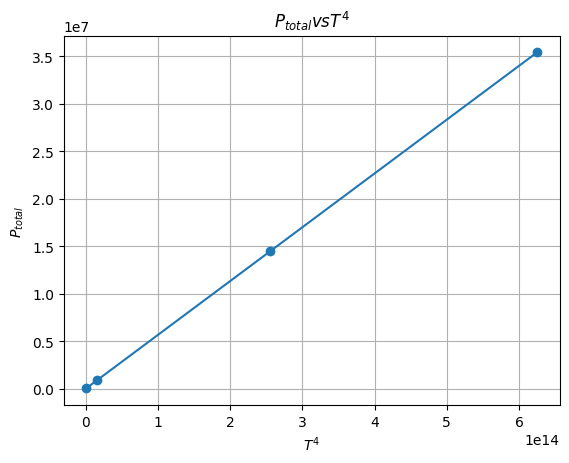

In [19]:
plt.plot(T**4,p_total, "o-")
plt.title("$P_{total} vs T^4$")
plt.xlabel("$T^4$")
plt.ylabel("$P_{total}$")
plt.grid()

Aqui hago la integración $P_{total}$ con la sustitucion sugeridad,luego compruebo que se aproxima al valor esperado $\frac{\pi^4}{15}$.

In [20]:
p_ = lambda x: x**3/(np.exp(x)-1)
resultado, error = quad(p_, 0, np.inf)
resultado

<ipython-input-20-b9e250fc774d>:1: RuntimeWarning: overflow encountered in exp
  p_ = lambda x: x**3/(np.exp(x)-1)


6.49393940226683

In [21]:
r = np.pi**4/15
r

6.493939402266828

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.






In [22]:
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]
# Muestra las primeras filas del DataFrame
print(data.head())

    Año  NoSauvizado  Promedio_5
0  1880        -0.17       -0.09
1  1881        -0.09       -0.13
2  1882        -0.11       -0.17
3  1883        -0.17       -0.21
4  1884        -0.29       -0.24


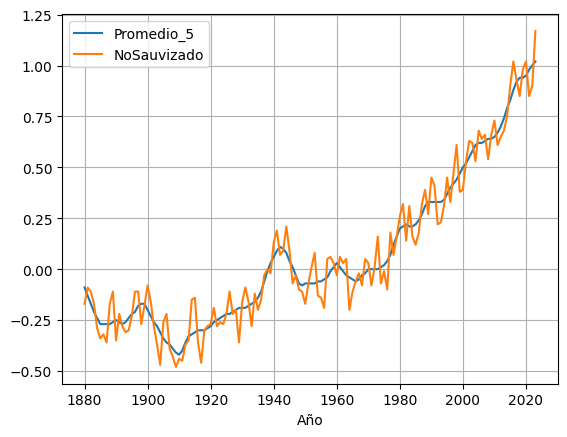

In [23]:
fig, ax = plt.subplots()
data.plot.line(x="Año", y="Promedio_5", ax=ax, label="Promedio_5")
data.plot.line(x="Año", y="NoSauvizado", ax=ax, label="NoSauvizado")
plt.grid()
plt.show()

In [24]:
print(data.tail())

      Año  NoSauvizado  Promedio_5
139  2019         0.98        0.94
140  2020         1.02        0.95
141  2021         0.85        0.98
142  2022         0.90        1.00
143  2023         1.17        1.02


3) R\=

*   El crecimiento de la temperatura media global ha sido en un grado mucho mayor desde los años 1960 en adelante.

*   Solo entre los años 1900 y 1920 se noto una disminunción en promedio de la temperatura.

*   Por los datos obtenidos y a partir de la grafica se deduce un amuento cada vez mayor de la temperatura media global, con un corpotamiento exponencial que solo indica que la temperatura aumentara cada vez más rapido y en mayor cantidad




Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.



6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.



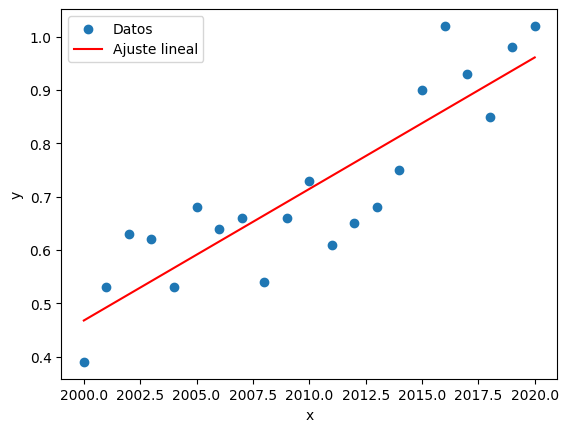

In [25]:
# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
data_filtrado = data[data["Año"].between(2000, 2020)]
x = data_filtrado["Año"]
y = data_filtrado["NoSauvizado"]

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(np.min(x), np.max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Aqui voy a interpolar entre los años 2000 y 2020

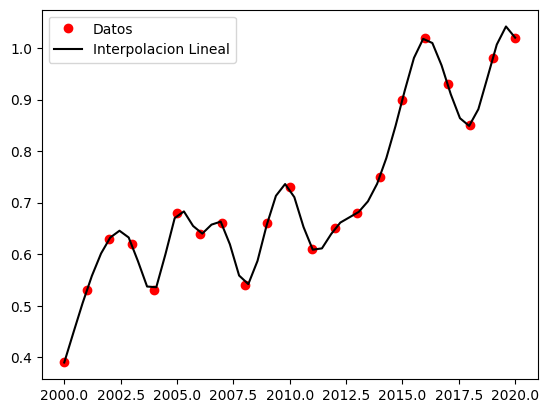

In [26]:
Cs = CubicSpline(x,y)
X = np.linspace(data_filtrado["Año"].min(), data_filtrado["Año"].max())
plt.plot(data_filtrado["Año"],data_filtrado["NoSauvizado"],"ro",label = "Datos")
plt.plot(X, Cs(X), "k-", label="Interpolacion Lineal")
plt.legend()
plt.show()







































































6) R\= Para este caso es preferible la regresion lineal ya que el objetivo es evaluar el incremento de la temperatura en años recientes, lo cual lo deja más en claro la regresion lineal. La interpolacion lo que nos permite visualizar el cambio de temperatura a partir de los datos pero es en la regresion que se evidencia el incremento en la temperatura.

7) R\= Se podria predecir determinando la ecuacion de la recta resultante de la regresion lineal. En este caso x_fit, y_fit son los valores de (x,y) de la recta con los cuales se llegaria a la ecuación de la recta. Consiguiendo la ecuacion de la recta ya solo quedaria evaluar para el año 2030 y la ecuación daria el valor de la temperatura para ese año.

**Nota**: Seleccione solo los datos entre 2000 y 2020 pero tambien se puede hacer entre 2000 y 2023 para tomar los datos de los ultimos años

In [27]:
# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x_fit, y_fit)

# Parámetros del ajuste
m, b = params
año_objetivo = 2030
temperatura = linear_func(año_objetivo, m, b)

print("La temperatura para el año 2030 es:", temperatura)

La temperatura para el año 2030 es: 1.2075324631057498
